In [ ]:
#@Author: Gemma Gordon
#@Date: March 2023 
## Script to identify the residues included in the epitope and paratope of an Ab-Ag complex based on buried surface area
    ## and determine distributions of paratope and epitope size 

For an Ab:Ag complex, find which residues are involved in binding based on changes in SASA when comparing chains alone vs in complex

https://pymolwiki.org/index.php/Get_area

In [1]:
import pandas as pd

In [2]:
from pymol import cmd

Create figure 

In [142]:
cmd.reinitialize()

In [143]:
cmd.fetch('6azz')

'6azz'

In [144]:
# remove irrelevant chains and overwrite 6azz 
cmd.extract('6azz_relevant', '6azz and chain C+B+A') # auth codes

In [145]:
cmd.create('Ag','6azz_relevant and chain A') # separate Ag object
cmd.create('Ab', '6azz_relevant and chain C+B')
#cmd.create('AbAg', '6azz_relevant and chain C+B+A')

In [146]:
cmd.get_area('Ag')

14183.6416015625

In [147]:
cmd.get_area('Ab')

41423.18359375

In [148]:
cmd.get_area('6azz_relevant') # check total area of complex smaller than total of Ab + Ag separately 

55525.21875

In [150]:
sasa_ab = cmd.get_sasa_relative('Ab')
sasa_ag = cmd.get_sasa_relative('Ag')
sasa_complex = cmd.get_sasa_relative('6azz_relevant')

In [198]:
sasa_ab_df, sasa_ag_df, sasa_complex_df = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
sasa_ab_df['res_id'], sasa_ab_df['sasa_unbound'] = [i[2:4] for i in sasa_ab.keys()], [j for j in sasa_ab.values()]

In [199]:
sasa_ag_df['res_id'], sasa_ag_df['sasa_unbound'] = [i[2:4] for i in sasa_ag.keys()], [j for j in sasa_ag.values()]
sasa_complex_df['res_id'], sasa_complex_df['sasa_bound'] = [i[2:4] for i in sasa_complex.keys()], [j for j in sasa_complex.values()]

In [200]:
pd.concat([sasa_ab_df, sasa_ag_df])

,res_id,sasa_unbound
0,"(C, 1)",0.748328
1,"(C, 2)",0.220329
2,"(C, 3)",0.450025
3,"(C, 4)",0.070972
4,"(C, 5)",0.487402
...,...,...
208,"(A, 226)",0.000000
209,"(A, 227)",0.000000
210,"(A, 228)",0.000000
211,"(A, 229)",0.000000


In [201]:
sasa_df = sasa_complex_df.merge(pd.concat([sasa_ab_df, sasa_ag_df]), how='outer', on='res_id')

In [202]:
sasa_df # shows SASA for each residue in Ab and Ag when bound and unbound
# NOTE res_id, 1st character is chain, 2nd is pymol residue num

,res_id,sasa_bound,sasa_unbound
0,"(C, 1)",0.748328,0.748328
1,"(C, 2)",0.194174,0.220329
2,"(C, 3)",0.450025,0.450025
3,"(C, 4)",0.070972,0.070972
4,"(C, 5)",0.487402,0.487402
...,...,...,...
829,"(A, 226)",0.000000,0.000000
830,"(A, 227)",0.000000,0.000000
831,"(A, 228)",0.000000,0.000000
832,"(A, 229)",0.000000,0.000000


In [226]:
sasa_filter = sasa_df.loc[sasa_df['sasa_bound'] < sasa_df['sasa_unbound']]
sasa_filter # residues where bound SASA is lower than unbound SASA and so residue must become more buried
## for 6azz Ag is chain A, Ab is chain C(heavy)/B(light)

,res_id,sasa_bound,sasa_unbound
1,"(C, 2)",0.194174,0.220329
26,"(C, 27)",0.198944,0.202409
29,"(C, 30)",0.399940,0.447574
30,"(C, 31)",0.395974,0.414437
31,"(C, 32)",0.098431,0.231390
32,"(C, 33)",0.030259,0.124539
49,"(C, 50)",0.087587,0.128103
51,"(C, 52)",0.053763,0.229565
53,"(C, 53)",0.424145,0.648382
54,"(C, 54)",0.463243,0.737200


#### Run for all complexes

In [3]:
abs_summary = pd.read_csv('Dataset_flAbs_summary.csv')
sdabs_summary = pd.read_csv('Dataset_sdAbs_summary.csv')

In [4]:
abs_filepath = 'temp_pdb_cif_abs' ## mmcif files of structures in Abs dataset
sdabs_filepath = 'temp_pdb_cif_nbs' ## mmcif files of structures in sdAbs dataset

In [5]:
def get_sasa_binding_site(pdb, summary_file, data_dir):

    results = []

    ab_chains = [chains for chains in summary_file['antibody_chain'].loc[summary_file['pdb'] == pdb]]
    #print(ab_chains)
    ag_chains = [chains for chains in summary_file['antigen_chain'].loc[summary_file['pdb'] == pdb]]
    #print(ag_chains)

    for ab, ag in zip(ab_chains, ag_chains):
        
        #print(ab, ag)
        all_chains = ab + ag
        all_chains_dict = {'Ab':ab, 'Ag':ag}
        #print(all_chains_dict)
        
        cmd.reinitialize()
        pdbfile = str(data_dir + '/' + pdb + '.cif')
        
        try:
            cmd.load(pdbfile)
        except:
            cmd.fetch(pdb)

        # remove irrelevant chains and overwrite pdb to only include
        cmd.extract('relevant_chains', str(pdb + ' and chain ' + '+'.join([a for a in all_chains])))# auth codes
        cmd.create('Ag', str('relevant_chains' + ' and chain ' + '+'.join([a for a in ag]))) # separate Ag object
        cmd.create('Ab', str('relevant_chains' + ' and chain ' + '+'.join([a for a in ab])))

        sasa_ab = cmd.get_sasa_relative('Ab')
        sasa_ag = cmd.get_sasa_relative('Ag')
        sasa_complex = cmd.get_sasa_relative('relevant_chains')

        sasa_ab_df, sasa_ag_df, sasa_complex_df = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        sasa_ab_df['res_id'], sasa_ab_df['sasa_unbound'] = [i[2:4] for i in sasa_ab.keys()], [j for j in sasa_ab.values()]
        sasa_ag_df['res_id'], sasa_ag_df['sasa_unbound'] = [i[2:4] for i in sasa_ag.keys()], [j for j in sasa_ag.values()]
        sasa_complex_df['res_id'], sasa_complex_df['sasa_bound'] = [i[2:4] for i in sasa_complex.keys()], [j for j in sasa_complex.values()]
        sasa_df = sasa_complex_df.merge(pd.concat([sasa_ab_df, sasa_ag_df]), how='outer', on='res_id')
        #print(sasa_df) # shows SASA for each residue in Ab and Ag when bound and unbound
        
        # NOTE res_id, 1st character is chain, 2nd is pymol residue num
        sasa_filter = sasa_df.loc[sasa_df['sasa_bound'] < sasa_df['sasa_unbound']]
        #print(sasa_filter) # residues where bound SASA is lower than unbound SASA and so residue must become more buried
        results.append([pdb, sasa_filter, all_chains_dict])

    return results

In [6]:
def get_binding_site_size(results):

    sasa_filter = results[1]
    all_chains_dict = results[2]

    epitope_size = 0
    paratope_size = 0

    for row in sasa_filter['res_id']:
        if row[0] in all_chains_dict['Ab']:
            paratope_size += 1
        elif row[0] in all_chains_dict['Ag']:
            epitope_size += 1

    return paratope_size, epitope_size

In [33]:
def get_epitope_numbering(results):

    sasa_filter = results[1]
    all_chains_dict = results[2]

    epitope_res = []

    for row in sasa_filter['res_id']:
        #print(row)
        if row[0] in all_chains_dict['Ag']:
            epitope_res.append(row[1]) # add to list of epitope residues to extract numbering later

    return epitope_res

In [34]:
sdabs_results = pd.DataFrame()
pdbs = []
epitope_numbering = []
# paratope_sizes = []
# epitope_sizes = []

failed_sdabs = []

for i, row in enumerate(sdabs_summary.iterrows()):
    try:
        #print(row[1]['pdb'])
        results = get_sasa_binding_site(row[1]['pdb'], sdabs_summary, sdabs_filepath)
        for r in results:
            epitope_res = get_epitope_numbering(r)
            epitope_numbering.append(epitope_res)
            pdbs.append(r[0])
    #     paratope_size, epitope_size = get_binding_site_size(r)
    #     pdbs.append(r[0])
    #     paratope_sizes.append(paratope_size)
    #     epitope_sizes.append(epitope_size)
        print(i + 1)
    except:
        failed_sdabs.append(row[1]['pdb'])
        print(i + 1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [35]:
sdabs_results['pdb'] = pdbs
sdabs_results['epitope_numbering'] = epitope_numbering
# sdabs_results['paratope_size'] = paratope_sizes
# sdabs_results['epitope_size'] = epitope_sizes

In [36]:
failed_sdabs

[]

In [37]:
sdabs_results

,pdb,epitope_numbering
0,7qiv,"[756, 758, 759, 760, 761, 762, 828, 829, 855, ..."
1,6fe4,"[31, 33, 34, 35, 36, 37, 39, 48, 49, 50, 51, 7..."
2,5l21,"[903, 904, 905, 907, 908, 909, 915, 917, 918, ..."
3,7a17,"[626, 627, 628, 629, 631, 642, 644, 647, 648, ..."
4,6h7o,"[76, 80, 135, 139, 142, 143, 144, 145, 146, 14..."
...,...,...
472,5c3l,"[427, 430, 431, 434, 435, 437, 438, 439, 441, ..."
473,7lzp,"[99, 100, 101, 102, 103, 105, 106, 109, 110, 1..."
474,7lzp,"[197, 198, 199, 200, 201, 246, 247, 269, 270, ..."
475,7lzp,"[1, 2, 3, 5, 6, 16, 17, 18, 37, 39, 40, 41, 99..."


In [50]:
sdabs_results

,pdb,epitope_numbering
0,7qiv,"[756, 758, 759, 760, 761, 762, 828, 829, 855, ..."
1,6fe4,"[31, 33, 34, 35, 36, 37, 39, 48, 49, 50, 51, 7..."
2,5l21,"[903, 904, 905, 907, 908, 909, 915, 917, 918, ..."
3,7a17,"[626, 627, 628, 629, 631, 642, 644, 647, 648, ..."
4,6h7o,"[76, 80, 135, 139, 142, 143, 144, 145, 146, 14..."
...,...,...
472,5c3l,"[427, 430, 431, 434, 435, 437, 438, 439, 441, ..."
473,7lzp,"[99, 100, 101, 102, 103, 105, 106, 109, 110, 1..."
474,7lzp,"[197, 198, 199, 200, 201, 246, 247, 269, 270, ..."
475,7lzp,"[1, 2, 3, 5, 6, 16, 17, 18, 37, 39, 40, 41, 99..."


In [49]:
sdabs_results = sdabs_results.drop_duplicates()

TypeError: unhashable type: 'list'

In [42]:
#sdabs_results.loc[sdabs_results['paratope_size'] < 7]

In [43]:
#abs_results.loc[abs_results['paratope_size'] < 7]


In [40]:
sdabs_results

,pdb,epitope_numbering
0,7qiv,"[756, 758, 759, 760, 761, 762, 828, 829, 855, ..."
1,6fe4,"[31, 33, 34, 35, 36, 37, 39, 48, 49, 50, 51, 7..."
2,5l21,"[903, 904, 905, 907, 908, 909, 915, 917, 918, ..."
3,7a17,"[626, 627, 628, 629, 631, 642, 644, 647, 648, ..."
4,6h7o,"[76, 80, 135, 139, 142, 143, 144, 145, 146, 14..."
...,...,...
472,5c3l,"[427, 430, 431, 434, 435, 437, 438, 439, 441, ..."
473,7lzp,"[99, 100, 101, 102, 103, 105, 106, 109, 110, 1..."
474,7lzp,"[197, 198, 199, 200, 201, 246, 247, 269, 270, ..."
475,7lzp,"[1, 2, 3, 5, 6, 16, 17, 18, 37, 39, 40, 41, 99..."


In [41]:
#sdabs_results = sdabs_results.drop_duplicates().reset_index()
sdabs_results.to_csv('sdabs_SASA_results_epitope.csv')
#sdabs_results.to_csv('sdabs_SASA_results.csv')

In [44]:
abs_results = pd.DataFrame()
pdbs = []
epitope_numbering = []
# paratope_sizes = []
# epitope_sizes = []

failed_abs = []

for i, row in enumerate(abs_summary.iterrows()):
    try:
        #print(row[1]['pdb'])
        results = get_sasa_binding_site(row[1]['pdb'], abs_summary, abs_filepath)
        for r in results:
            epitope_res = get_epitope_numbering(r)
            epitope_numbering.append(epitope_res)
            pdbs.append(r[0])
    #     paratope_size, epitope_size = get_binding_site_size(r)
    #     pdbs.append(r[0])
    #     paratope_sizes.append(paratope_size)
    #     epitope_sizes.append(epitope_size)
        print(i + 1)
    except:
        failed_abs.append(row[1]['pdb'])
        print(i + 1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [45]:
abs_results['pdb'] = pdbs
abs_results['epitope_numbering'] = epitope_numbering
# abs_results['paratope_size'] = paratope_sizes
# abs_results['epitope_size'] = epitope_sizes

In [46]:
failed_abs

[]

In [47]:
abs_results

,pdb,epitope_numbering
0,7mdj,"[45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 5..."
1,7sem,"[36, 41, 42, 43, 44, 120, 148, 156, 232, 233, ..."
2,7jmo,"[403, 405, 406, 415, 416, 417, 420, 421, 449, ..."
3,7orb,"[345, 346, 440, 441, 442, 443, 444, 445, 446, ..."
4,7orb,"[417, 421, 453, 455, 456, 457, 458, 473, 474, ..."
...,...,...
1009,4lst,"[97, 122, 124, 276, 278, 279, 280, 281, 282, 2..."
1010,4lss,"[97, 105, 122, 123, 124, 275, 276, 278, 279, 2..."
1011,2yss,"[13, 14, 15, 16, 18, 19, 20, 21, 22, 62, 63, 7..."
1012,1uac,"[13, 14, 15, 16, 18, 19, 20, 21, 62, 63, 72, 7..."


In [48]:
abs_results = abs_results.drop_duplicates().reset_index()

TypeError: unhashable type: 'list'

In [12]:
abs_results

,index,pdb,paratope_size,epitope_size
0,0,7mdj,23,17
1,1,7sem,24,34
2,2,7jmo,36,33
3,3,7orb,22,24
4,4,7orb,23,22
...,...,...,...,...
887,1009,4lst,30,42
888,1010,4lss,30,40
889,1011,2yss,27,27
890,1012,1uac,27,22


In [51]:
#abs_results.to_csv('abs_SASA_results.csv')
abs_results.to_csv('abs_SASA_results_epitope.csv')

In [60]:
sdabs_results['str_nums'] = [str(s) for s in sdabs_results['epitope_numbering']]

In [66]:
abs_results['str_nums'] = [str(s) for s in abs_results['epitope_numbering']]

In [69]:
sdabs_results = sdabs_results.drop_duplicates(subset='str_nums', keep='first').drop(labels='str_nums', axis=1).reset_index()

In [67]:
abs_results.drop_duplicates(subset='str_nums', keep='first')

,pdb,epitope_numbering,str_nums
0,7mdj,"[45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 5...","['45', '46', '48', '49', '51', '52', '53', '54..."
1,7sem,"[36, 41, 42, 43, 44, 120, 148, 156, 232, 233, ...","['36', '41', '42', '43', '44', '120', '148', '..."
2,7jmo,"[403, 405, 406, 415, 416, 417, 420, 421, 449, ...","['403', '405', '406', '415', '416', '417', '42..."
3,7orb,"[345, 346, 440, 441, 442, 443, 444, 445, 446, ...","['345', '346', '440', '441', '442', '443', '44..."
4,7orb,"[417, 421, 453, 455, 456, 457, 458, 473, 474, ...","['417', '421', '453', '455', '456', '457', '45..."
...,...,...,...
1009,4lst,"[97, 122, 124, 276, 278, 279, 280, 281, 282, 2...","['97', '122', '124', '276', '278', '279', '280..."
1010,4lss,"[97, 105, 122, 123, 124, 275, 276, 278, 279, 2...","['97', '105', '122', '123', '124', '275', '276..."
1011,2yss,"[13, 14, 15, 16, 18, 19, 20, 21, 22, 62, 63, 7...","['13', '14', '15', '16', '18', '19', '20', '21..."
1012,1uac,"[13, 14, 15, 16, 18, 19, 20, 21, 62, 63, 72, 7...","['13', '14', '15', '16', '18', '19', '20', '21..."


In [70]:
abs_results = abs_results.drop_duplicates(subset='str_nums', keep='first').drop(labels='str_nums', axis=1).reset_index()

In [73]:
abs_results.to_csv('Abs_SASA_results_epitope_unique.csv')
sdabs_results.to_csv('sdAbs_SASA_results_epitope_unique.csv')

In [15]:
#sdabs_results = pd.read_csv('sdabs_SASA_results.csv')

#### Plot distributions paratope and epitope sizes of Abs and sdAbs using the SASA-defined binding sites

In [9]:
abs_results = pd.read_csv('Abs_SASA_results.csv')
sdabs_results = pd.read_csv('sdAbs_SASA_results.csv')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np
from statsmodels.stats.weightstats import ztest as ztest
import dabest

In [5]:
plt.rcParams['figure.dpi'] = 1200

In [6]:
def perform_bootstrap(n_sample, interaction_sizes):
    df = pd.DataFrame([np.random.choice(interaction_sizes[k],n_sample,replace=False) for k in interaction_sizes]).T
    df.columns = [k for k in interaction_sizes]
    x = dabest.load(df, idx=(list(interaction_sizes.keys())[0],list(interaction_sizes.keys())[1]))
    print(x.mean_diff)

def plot_interaction_length(list_1, list_2, type_interaction, ab_type1, ab_type2, color1, color2, bins =20):
    #Plot the difference between the epitope/paratope length
    # mean_1 = round(np.mean(np.array(list_1)), 2)
    # median_1 = round(np.median(np.array(list_1)), 2)
    # std_1 = round(np.std(np.array(list_1)), 2)
    
    
    # mean_2 = round(np.mean(np.array(list_2)), 2)
    # median_2 = round(np.median(np.array(list_2)), 2)
    # std_2 = round(np.std(np.array(list_2)), 2)
    
    # plt.hist(list_1, alpha=0.5, bins = bins, label=f"{ab_type1} \n ({mean_1}, {median_1}, {std_1})", density=True, stacked = True, color = color1)
    # plt.hist(list_2, alpha=0.5, bins = bins, label=f"{ab_type2} \n ({mean_2}, {median_2}, {std_2})", density=True, stacked = True, color = color2)
    plt.hist(list_1, bins = bins, label=ab_type1, density=True, stacked = True, color = color1, alpha=0.7)
    plt.hist(list_2, bins = bins, label=ab_type2, density=True, stacked = True, color = color2, alpha=0.7)
    plt.xlabel(f"{type_interaction} size", fontsize = 12)
    plt.ylabel("Normalised frequency", fontsize = 12)
    plt.legend(fontsize = 12)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tight_layout()
    # plt.show()
    plt.savefig(f'{type_interaction}_arp_size.png', bbox_inches='tight')

In [10]:
sdabs_results.columns

Index(['Unnamed: 0', 'index', 'pdb', 'paratope_size', 'epitope_size'], dtype='object')

In [11]:
## filter out bug 0 values for now
sdabs_results = sdabs_results.loc[sdabs_results['paratope_size'] > 7]

In [12]:
abs_results = abs_results.loc[abs_results['paratope_size'] > 7]

DABEST v0.3.1
             
Good afternoon!
The current time is Mon May 22 15:52:49 2023.

The unpaired mean difference between sdab and flab is 0.73 [95%CI -0.333, 1.84].
The p-value of the two-sided permutation t-test is 0.18. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


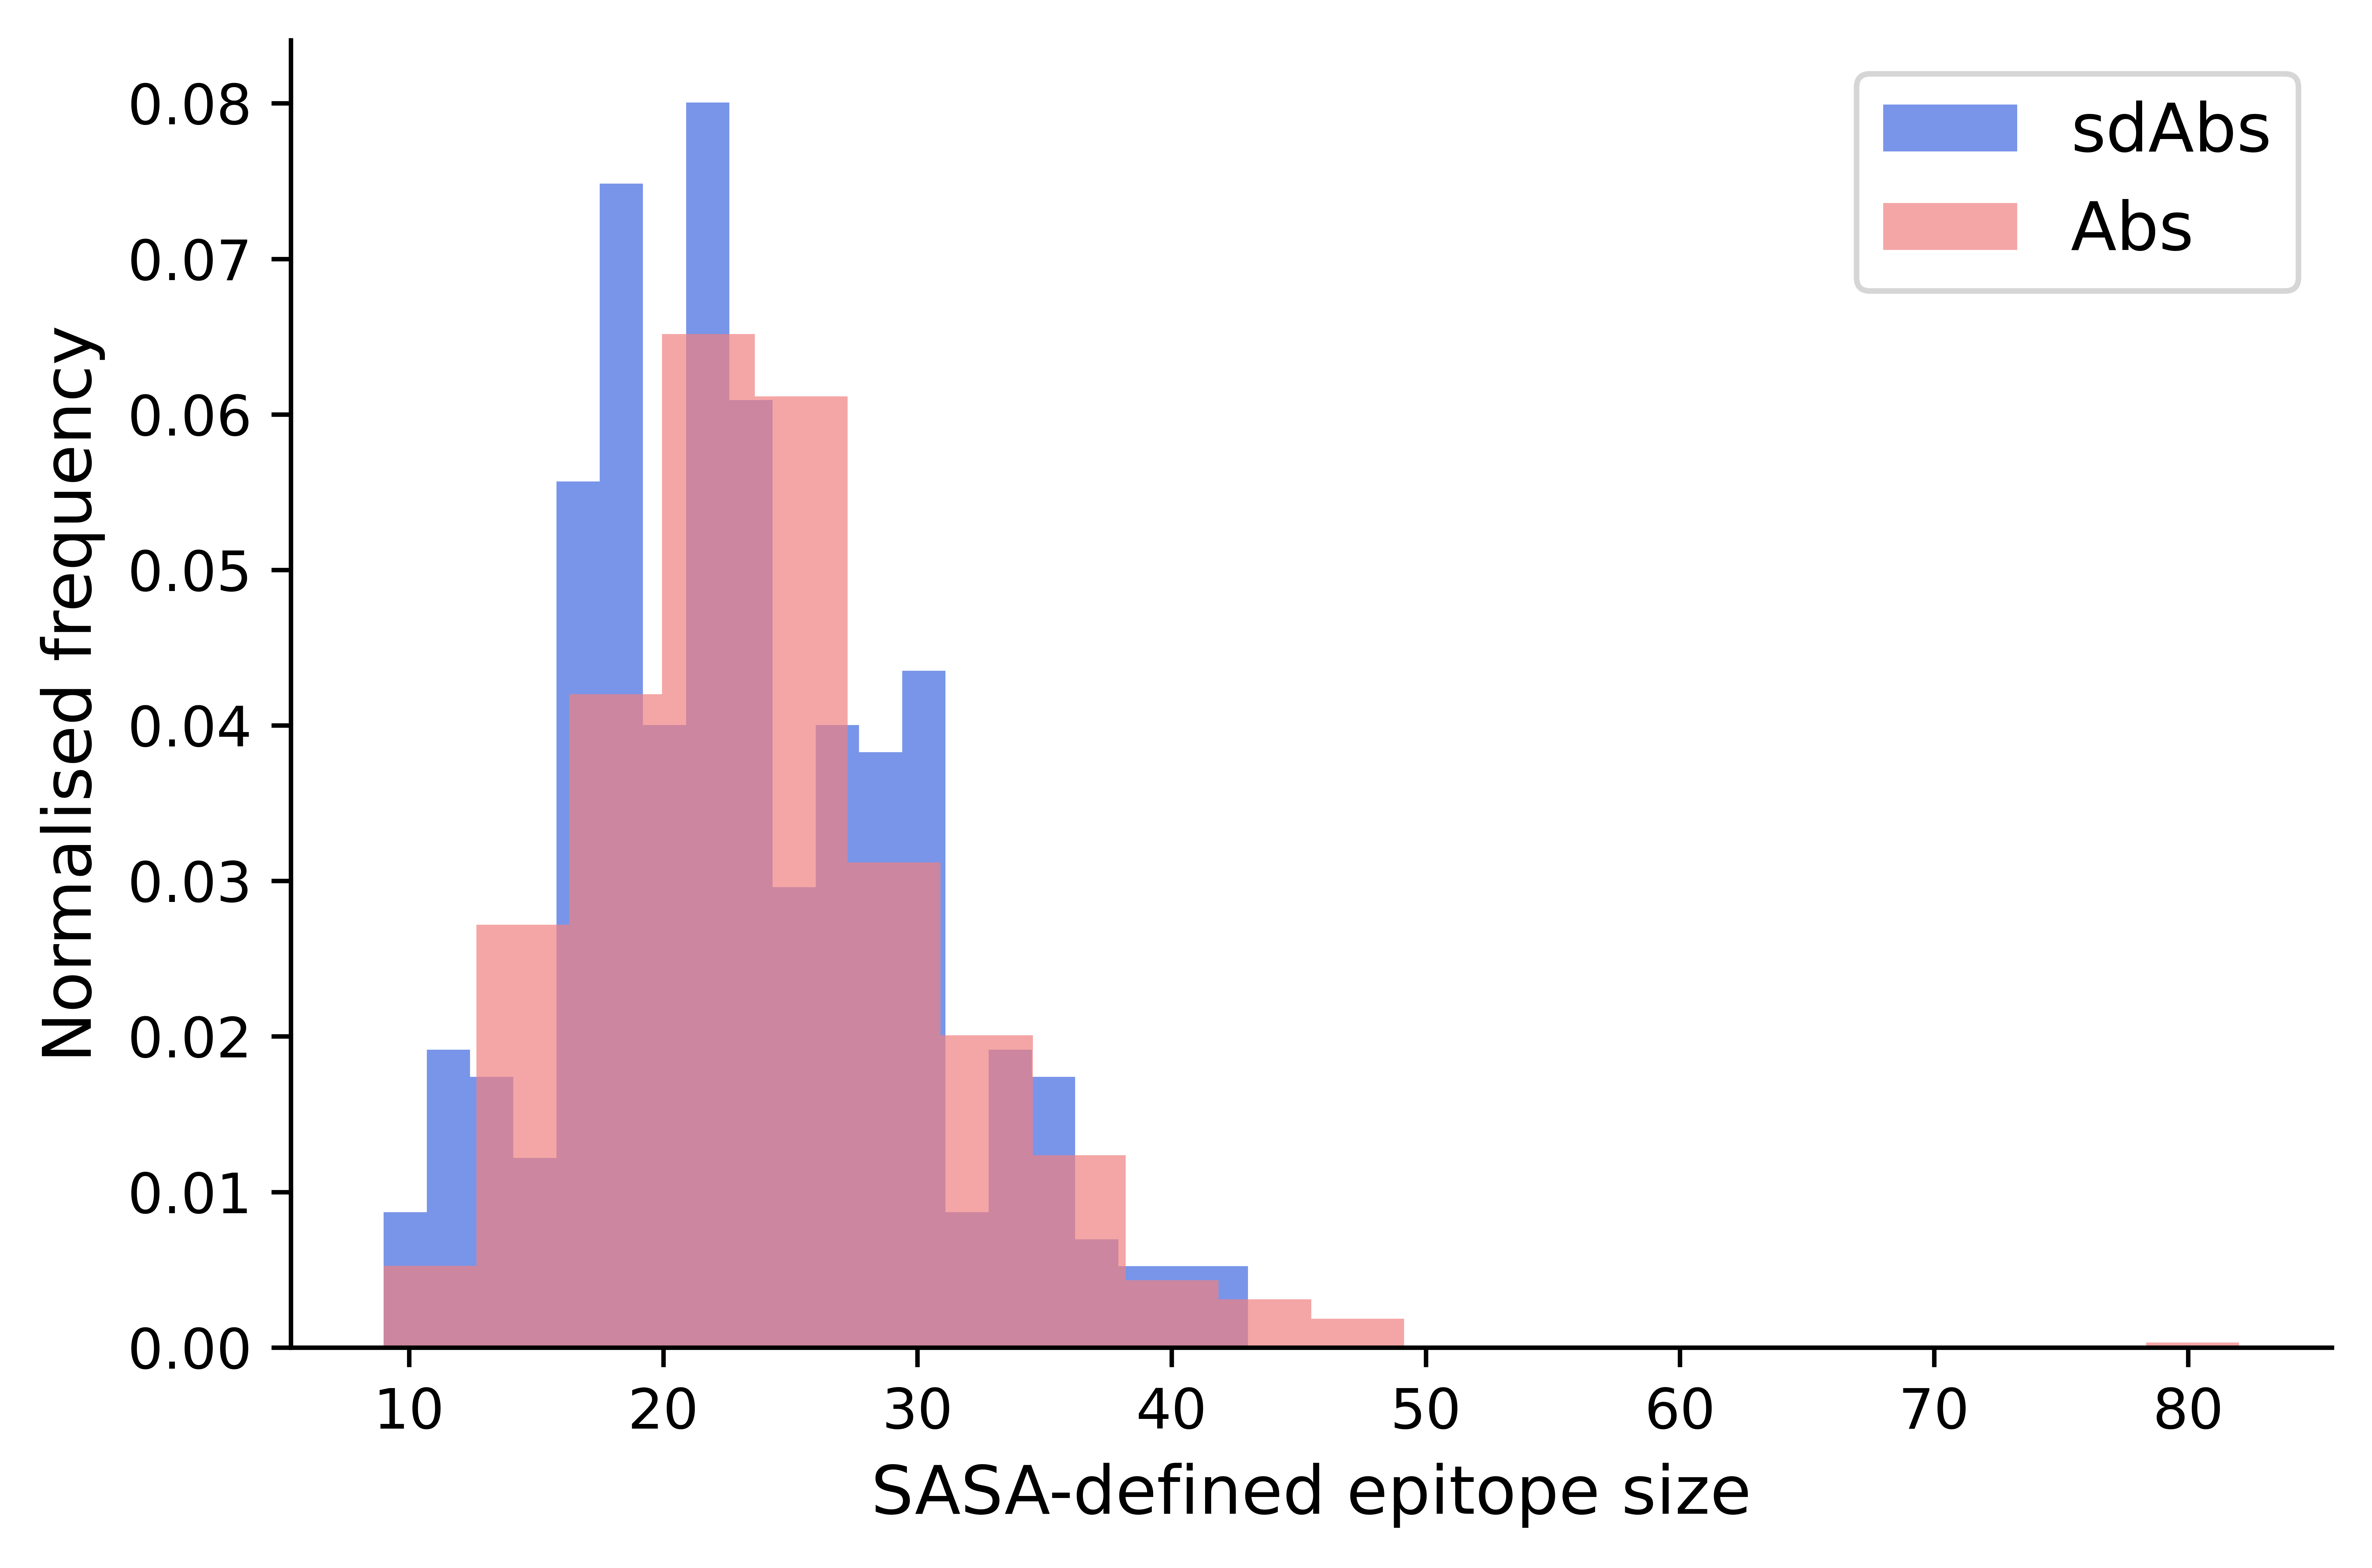

In [13]:
#Plot epitope sizes
plot_interaction_length(sdabs_results["epitope_size"], abs_results["epitope_size"], 'SASA-defined epitope', 'sdAbs', 'Abs', 'royalblue', 'lightcoral', bins=20)
ztest(sdabs_results["epitope_size"], abs_results["epitope_size"], value=0) 
perform_bootstrap(300, {'sdab': sdabs_results["epitope_size"], 'flab': abs_results["epitope_size"]})

DABEST v0.3.1
             
Good afternoon!
The current time is Mon May 22 15:54:39 2023.

The unpaired mean difference between sdab and flab is 4.32 [95%CI 3.44, 5.2].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


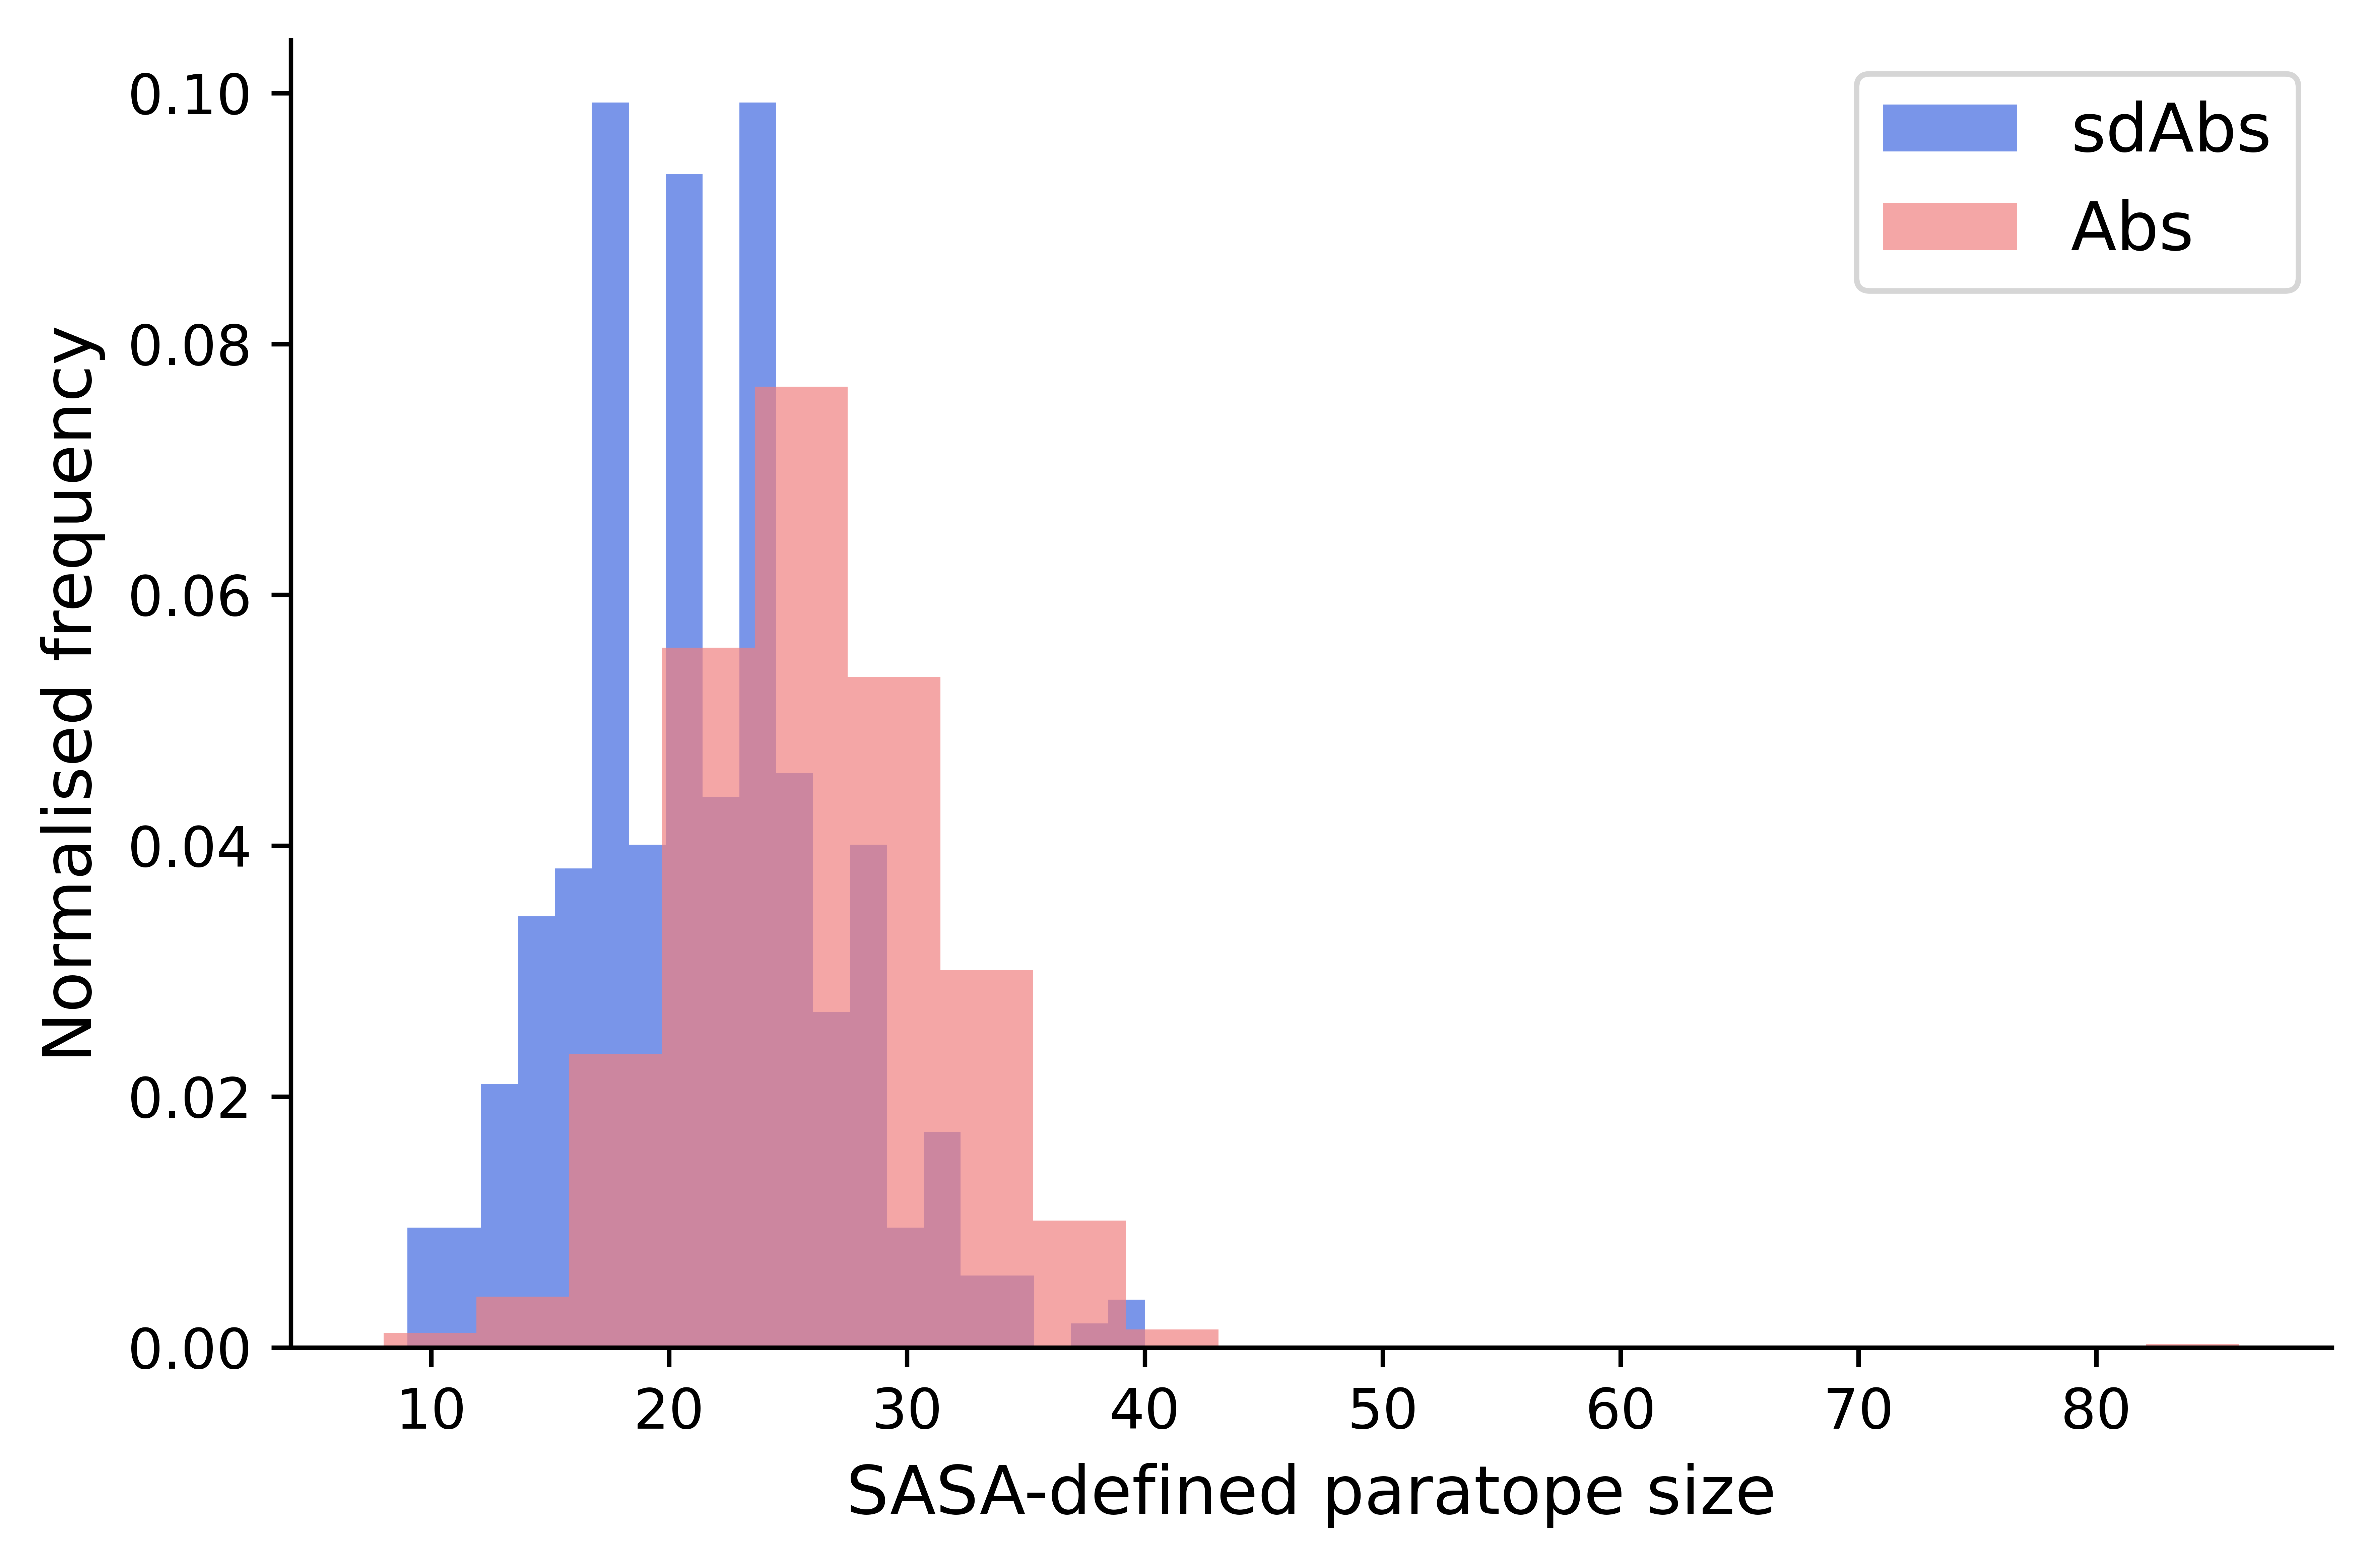

In [14]:
#Plot paratope sizes
plot_interaction_length(sdabs_results["paratope_size"], abs_results["paratope_size"], 'SASA-defined paratope', 'sdAbs', 'Abs', 'royalblue', 'lightcoral', bins=20)
ztest(sdabs_results["paratope_size"], abs_results["paratope_size"], value=0) 
perform_bootstrap(300, {'sdab': sdabs_results["paratope_size"], 'flab': abs_results["paratope_size"]})